In [1]:
import scanpy as sc
import warnings
from bbtnn import bbtnn as bt
warnings.filterwarnings('ignore')

C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\google\protobuf\descriptor.py:47: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from google.protobuf.pyext import _message
C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\util\nest.py:1287: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  _pywrap_tensorflow.RegisterType("Sequence", _collections.Sequence)
C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\training\tracking\object_identity.py:112: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class ObjectIdentitySet(collections.MutableSet):
C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\si

In [2]:
adata=sc.read("/Users/lsimon/OneDrive/Miko/UTHealth/projects/BatchBalancedTriplets/data/MouseAtlas/MouseAtlas.subset.h5ad")

In [3]:
subset=adata[adata.obs["Dataset"].isin(["MCA", "Tabula(Droplet)"])]

In [ ]:
sc.pp.pca(subset)
sc.pp.neighbors(subset)
sc.tl.umap(subset)

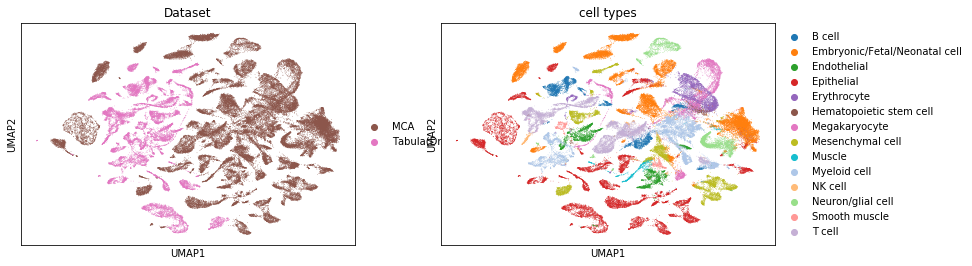

In [5]:
sc.pl.umap(subset, color = ["Dataset", "cell types"])

In [5]:
bdata = subset

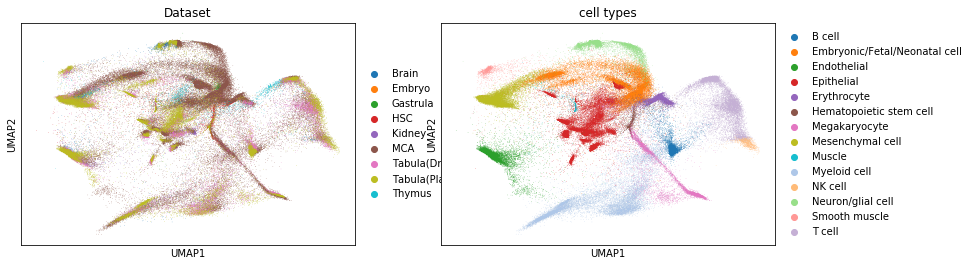

In [15]:
bdata.obsm["X_umap"]=embedding
sc.pl.umap(bdata, color = ["Dataset", "cell types"])

In [6]:
bdata

AnnData object with n_obs × n_vars = 77077 × 2797 
    obs: 'Organ', 'n_genes', 'n_counts', 'sample', 'louvain', 'summary2', 'batch', 'organ_sample', 'cnk', 'smp_org', 'chk', 'summary1', 'Organ groups', 'organ groups', 'cell types', 'Dataset', 'Cell types', 'Hox_genes'
    var: 'GeneName', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Cell types_colors', 'Dataset_colors', 'Organ groups_colors', 'cell types_colors', 'idx', 'louvain', 'louvain_colors', 'neighbors', 'organ groups_colors', 'pca', 'rank_genes_groups', 'sample_color', 'sample_colors', 'summary1_colors', 'summary2_colors'
    obsm: 'X_pca', 'X_umap', 'X_umap_3D'
    varm: 'PCs'

In [7]:
from ivis_animate import IvisAnimate

W1220 12:15:07.050857 20216 deprecation.py:323] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4075: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1220 12:15:07.112684 20216 deprecation.py:506] From C:\Users\lsimon\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9


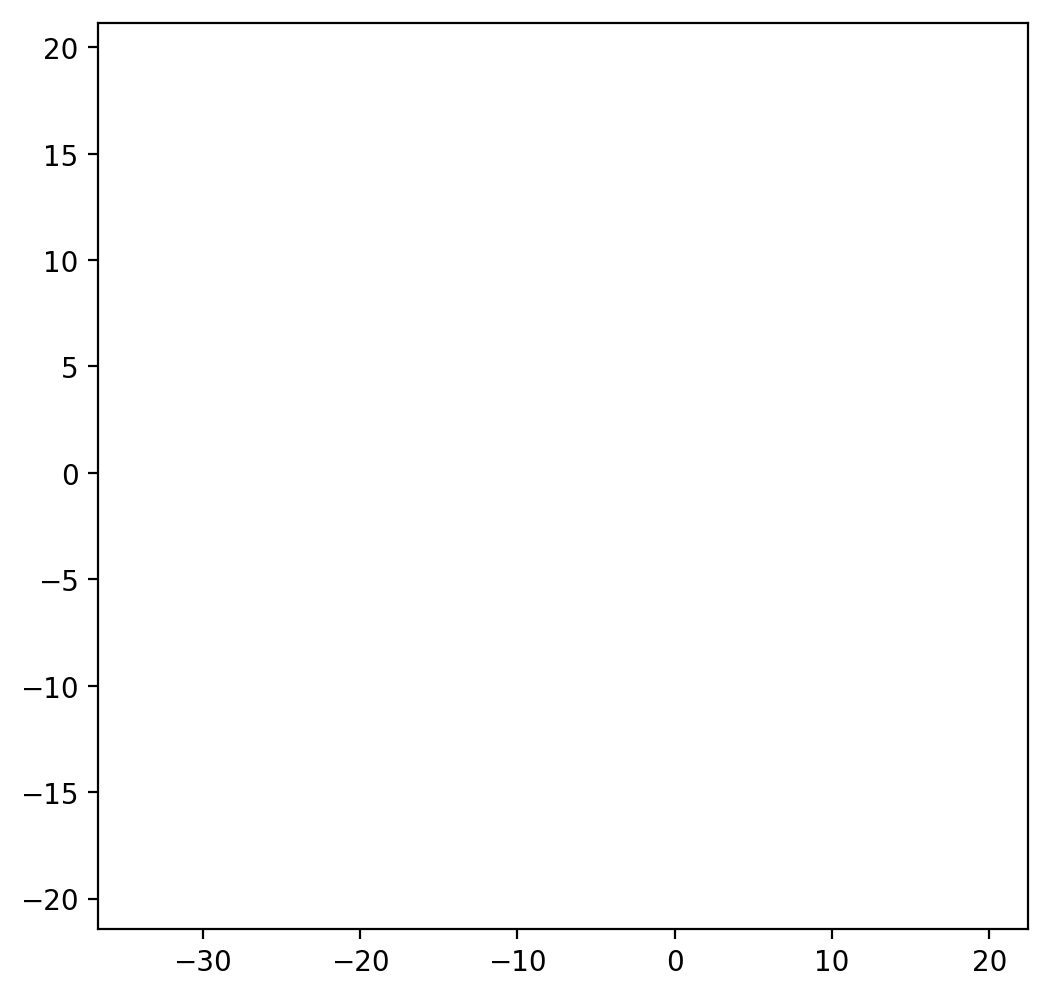

In [8]:
embedding = bt.unsupervised_bbtnn(X= bdata.obsm["X_pca"], Y = None, batch = bdata.obs["Dataset"], verbose = 0,
                                model = "szubert", n_pcs = 50, epochs = 1)
animation = IvisAnimate(embedding[1], frames = 10).animate(bdata.obsm["X_pca"])

In [22]:
#animation.save('/Users/lsimon/Downloads/animation.mp4')

In [9]:
animation.save("/Users/lsimon/Downloads/animation.gif")

W1220 12:16:08.123713 20216 animation.py:1136] MovieWriter ffmpeg unavailable. Trying to use pillow instead.
